# <center> Customer Flight Satisfaction Prediction & Pipeline Demo

# Data loading and preprocessing

### 1. Import Pandas, Numpy, pyplot and seaborn

In [11]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity

### 2. Import the dataframes that are needed
- Import "Flight data_Train.csv" and "Surveydata_Train.csv"

In [12]:
df1 = pd.read_csv("Flight_data.csv")   # Read the data regarding customer attributes
df2 = pd.read_csv("Survey_data.csv")   # Feedback data from customers

In [13]:
df1

,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0
...,...,...,...,...,...,...,...,...,...
90912,240877,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,0.0
90913,240878,Female,disloyal Customer,29,Personal Travel,Eco,1731,0,0.0
90914,240879,Male,disloyal Customer,69,Personal Travel,Eco,2320,155,163.0
90915,240880,Male,disloyal Customer,66,Personal Travel,Eco,2450,193,205.0


In [14]:
df2

,Id,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,acceptable,poor,need improvement,need improvement,poor
1,193378,satisfied,excellent,need improvement,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,acceptable,excellent,acceptable,excellent,acceptable
2,174522,satisfied,good,good,good,manageable,acceptable,excellent,excellent,need improvement,need improvement,good,need improvement,excellent,need improvement,excellent
3,191830,satisfied,good,good,good,manageable,poor,good,poor,poor,poor,good,poor,acceptable,acceptable,poor
4,221497,satisfied,good,good,NaN,Convinient,good,good,good,good,good,good,good,excellent,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,204826,neutral or dissatisfied,good,acceptable,excellent,manageable,good,good,good,need improvement,need improvement,need improvement,good,poor,need improvement,acceptable
6681,222571,satisfied,acceptable,NaN,acceptable,manageable,poor,acceptable,excellent,good,good,good,good,acceptable,good,need improvement
6682,151690,satisfied,excellent,need improvement,excellent,Convinient,good,good,good,poor,poor,excellent,poor,good,poor,need improvement
6683,170711,neutral or dissatisfied,acceptable,excellent,acceptable,need improvement,excellent,acceptable,excellent,excellent,acceptable,poor,poor,need improvement,need improvement,excellent


### 3. Join the two dataframes using the 'id' column as the primary key
- Rename the Id column of one dataframe so that there "id" column name becomes same

In [15]:
#Using pandas' Join method
#c = a.join(b)  # Joining two dfs on the 'Id' column

df = df2.set_index("Id").join(df1.set_index("ID"))

print(df.shape)
df.head()  # the combined dataframe

(6685, 23)


,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,...,need improvement,poor,Male,Loyal Customer,30,Business travel,Business,1354,11,8.0
193378,satisfied,excellent,need improvement,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,...,excellent,acceptable,Female,disloyal Customer,20,NaN,Business,1439,6,0.0
174522,satisfied,good,good,good,manageable,acceptable,excellent,excellent,need improvement,need improvement,...,need improvement,excellent,Female,NaN,55,Personal Travel,Eco Plus,976,4,0.0
191830,satisfied,good,good,good,manageable,poor,good,poor,poor,poor,...,acceptable,poor,Male,disloyal Customer,24,Business travel,Eco,2291,0,0.0
221497,satisfied,good,good,NaN,Convinient,good,good,good,good,good,...,good,good,Male,Loyal Customer,32,Business travel,Business,3974,0,0.0


### 4. Print the number of missing values in each of the columns

In [16]:
df.isna().sum() # Since True is 1 and False is 0, if you do a sum of a boolean dataframe, we get the number of trues in each col

Satisfaction                           0
Seat_comfort                           0
Departure.Arrival.time_convenient    555
Food_drink                           629
Gate_location                          0
Inflightwifi_service                   0
Inflight_entertainment                 0
Online_support                         1
Ease_of_Onlinebooking                  1
Onboard_service                      529
Leg_room_service                       1
Baggage_handling                       1
Checkin_service                        1
Cleanliness                            1
Online_boarding                        1
Gender                                 0
CustomerType                         665
Age                                    0
TypeTravel                           644
Class                                  0
Flight_Distance                        0
DepartureDelayin_Mins                  0
ArrivalDelayin_Mins                   17
dtype: int64

In [17]:
# you can also find it using the snippet below
df.isnull().apply(pd.value_counts)  

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
False,6685.0,6685.0,6130,6056,6685.0,6685.0,6685.0,6684,6684,6156,...,6684,6684,6685.0,6020,6685.0,6041,6685.0,6685.0,6685.0,6668
True,NaN,NaN,555,629,NaN,NaN,NaN,1,1,529,...,1,1,NaN,665,NaN,644,NaN,NaN,NaN,17


### 5. Drop all the rows having atleast one missing values and check the shape of the dataframe before and after dropping the rows
- Fill null values in ArrivalDelayin_Mins with mean
- After that drop all the rows with null values

In [18]:
# There are a few columns where out of the total ~90k records, ~8k have missing value. Imputing them with a central tendency
# might add undesirable noise in the data. Hence, lets tackle only the columns that have less missing values.

# But before imputation let us check the distribution of the data. If there are outliers, we would prefer to impute with median
# else mean can be good option.


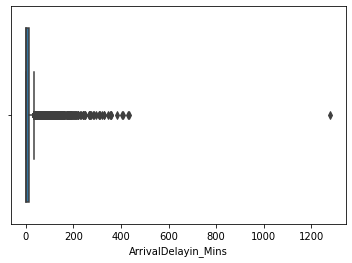

In [19]:
sns.boxplot(df['ArrivalDelayin_Mins']);

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6685.0,39.470905,15.014772,7.0,27.0,40.0,51.0,85.0
Flight_Distance,6685.0,1969.216904,1016.268070,53.0,1342.0,1915.0,2522.0,6837.0
DepartureDelayin_Mins,6685.0,14.228123,37.865974,0.0,0.0,0.0,12.0,1305.0
ArrivalDelayin_Mins,6668.0,14.668716,38.343234,0.0,0.0,0.0,13.0,1280.0


In [21]:
# the above two analysis suggest that we are in for many outliers
# so let us use the median to impute the values

df.ArrivalDelayin_Mins.fillna(df.ArrivalDelayin_Mins.median(), inplace = True)

# Alternate way - You can use the simpleimputer function of the sklearn.impute. You can try it out!
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') 
# df['ArrivalDelayin_Mins'] = imputer.fit_transform(df['ArrivalDelayin_Mins'].values.reshape(-1,1))

In [22]:
# Rest other missing values are filled with not_captured.
#It can be done in other way also or also can be dropped according to the problem and business context.
df.dropna(inplace = True) 

In [23]:
print(df.shape)

(3982, 23)


# Exploratory Data Analysis

### 6. Print correlation

In [24]:
cor = df.corr() # It will show correlation of only numerical variables here.

In [25]:
cor

,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Age,1.000000,-0.256374,-0.000352,-0.002651
Flight_Distance,-0.256374,1.000000,0.103526,0.109809
DepartureDelayin_Mins,-0.000352,0.103526,1.000000,0.956307
ArrivalDelayin_Mins,-0.002651,0.109809,0.956307,1.000000


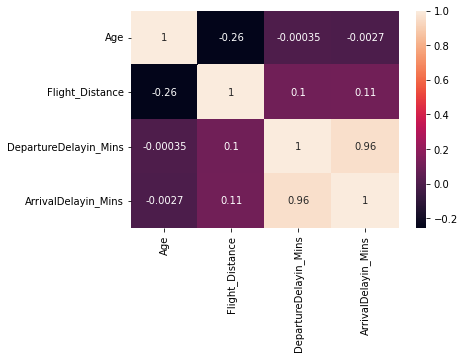

In [26]:
sns.heatmap(cor,annot=True);

- There is just one obvious correlation that we can see that is between arrival delay and departure delay. We can drop one of the variables here

In [27]:
to_drop = ['DepartureDelayin_Mins']

### Feedback columns
Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location',
'Inflightwifi_service', 'Inflight_entertainment', 'Online_support',
'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service',
'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding'

### 7. Manually encode these variables(printed above) such that they follow an order based on the meaning. 

In [28]:
df

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,...,need improvement,poor,Male,Loyal Customer,30,Business travel,Business,1354,11,8.0
191830,satisfied,good,good,good,manageable,poor,good,poor,poor,poor,...,acceptable,poor,Male,disloyal Customer,24,Business travel,Eco,2291,0,0.0
228137,satisfied,excellent,excellent,excellent,very convinient,acceptable,excellent,excellent,good,good,...,good,acceptable,Male,Loyal Customer,47,Business travel,Business,657,0,0.0
240081,satisfied,poor,poor,poor,Inconvinient,excellent,excellent,excellent,good,need improvement,...,acceptable,excellent,Female,Loyal Customer,30,Business travel,Business,5342,140,125.0
233692,satisfied,poor,poor,poor,Inconvinient,need improvement,excellent,excellent,excellent,excellent,...,excellent,acceptable,Male,Loyal Customer,58,Business travel,Business,351,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171869,neutral or dissatisfied,acceptable,excellent,acceptable,Convinient,acceptable,acceptable,acceptable,acceptable,poor,...,need improvement,acceptable,Female,Loyal Customer,12,Personal Travel,Eco,1170,0,0.0
181163,neutral or dissatisfied,need improvement,extremely poor,need improvement,Inconvinient,acceptable,need improvement,acceptable,acceptable,acceptable,...,need improvement,acceptable,Male,disloyal Customer,20,Business travel,Eco,1945,0,0.0
185132,neutral or dissatisfied,need improvement,excellent,need improvement,Inconvinient,poor,need improvement,poor,poor,good,...,good,poor,Female,disloyal Customer,27,Business travel,Eco,2501,0,0.0


In [29]:
df['Departure.Arrival.time_convenient'].value_counts()

good                897
excellent           817
need improvement    755
acceptable          695
poor                603
extremely poor      215
Name: Departure.Arrival.time_convenient, dtype: int64

In [30]:
df['Gate_location'].value_counts()

manageable          1031
Convinient           939
need improvement     761
Inconvinient         675
very convinient      576
Name: Gate_location, dtype: int64

In [31]:
# Manual label encoding
df.replace({'extremely poor' : 0, 'poor' : 1, 'need improvement' : 2, 'acceptable' : 3, 
            'good' : 4, 'excellent' : 5}, inplace = True)  

df.replace({'very inconvinient' : 0, 'Inconvinient' : 1, 'need improvement' : 2, 'manageable' : 3,
            'Convinient' : 4, 'very convinient' : 5}, inplace = True)

In [32]:
df

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,neutral or dissatisfied,1,3,3,3,1,2,1,1,3,...,2,1,Male,Loyal Customer,30,Business travel,Business,1354,11,8.0
191830,satisfied,4,4,4,3,1,4,1,1,1,...,3,1,Male,disloyal Customer,24,Business travel,Eco,2291,0,0.0
228137,satisfied,5,5,5,5,3,5,5,4,4,...,4,3,Male,Loyal Customer,47,Business travel,Business,657,0,0.0
240081,satisfied,1,1,1,1,5,5,5,4,2,...,3,5,Female,Loyal Customer,30,Business travel,Business,5342,140,125.0
233692,satisfied,1,1,1,1,2,5,5,5,5,...,5,3,Male,Loyal Customer,58,Business travel,Business,351,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171869,neutral or dissatisfied,3,5,3,4,3,3,3,3,1,...,2,3,Female,Loyal Customer,12,Personal Travel,Eco,1170,0,0.0
181163,neutral or dissatisfied,2,0,2,1,3,2,3,3,3,...,2,3,Male,disloyal Customer,20,Business travel,Eco,1945,0,0.0
185132,neutral or dissatisfied,2,5,2,1,1,2,1,1,4,...,4,1,Female,disloyal Customer,27,Business travel,Eco,2501,0,0.0


In [33]:
# check for encodings
df['Departure.Arrival.time_convenient'].value_counts()

4    897
5    817
2    755
3    695
1    603
0    215
Name: Departure.Arrival.time_convenient, dtype: int64

### 8. Display countplot of every feedback attribute with respect to Customer Satisfaction. 

You can use sns.countplot and set hue  = 'Satisfaction'

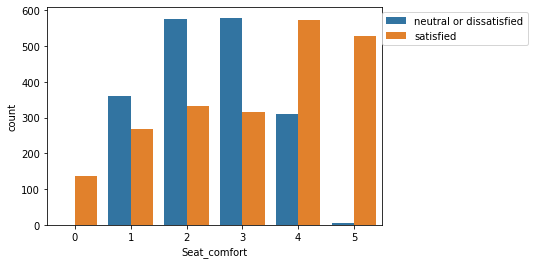

In [34]:
# We can use seaborn's countplot to plot a stacked baatchart
sns.countplot(df.Seat_comfort, hue = df.Satisfaction) 
plt.legend(loc = 'upper right', bbox_to_anchor=(1.45, 1)); # to place the legend in a 'good' position

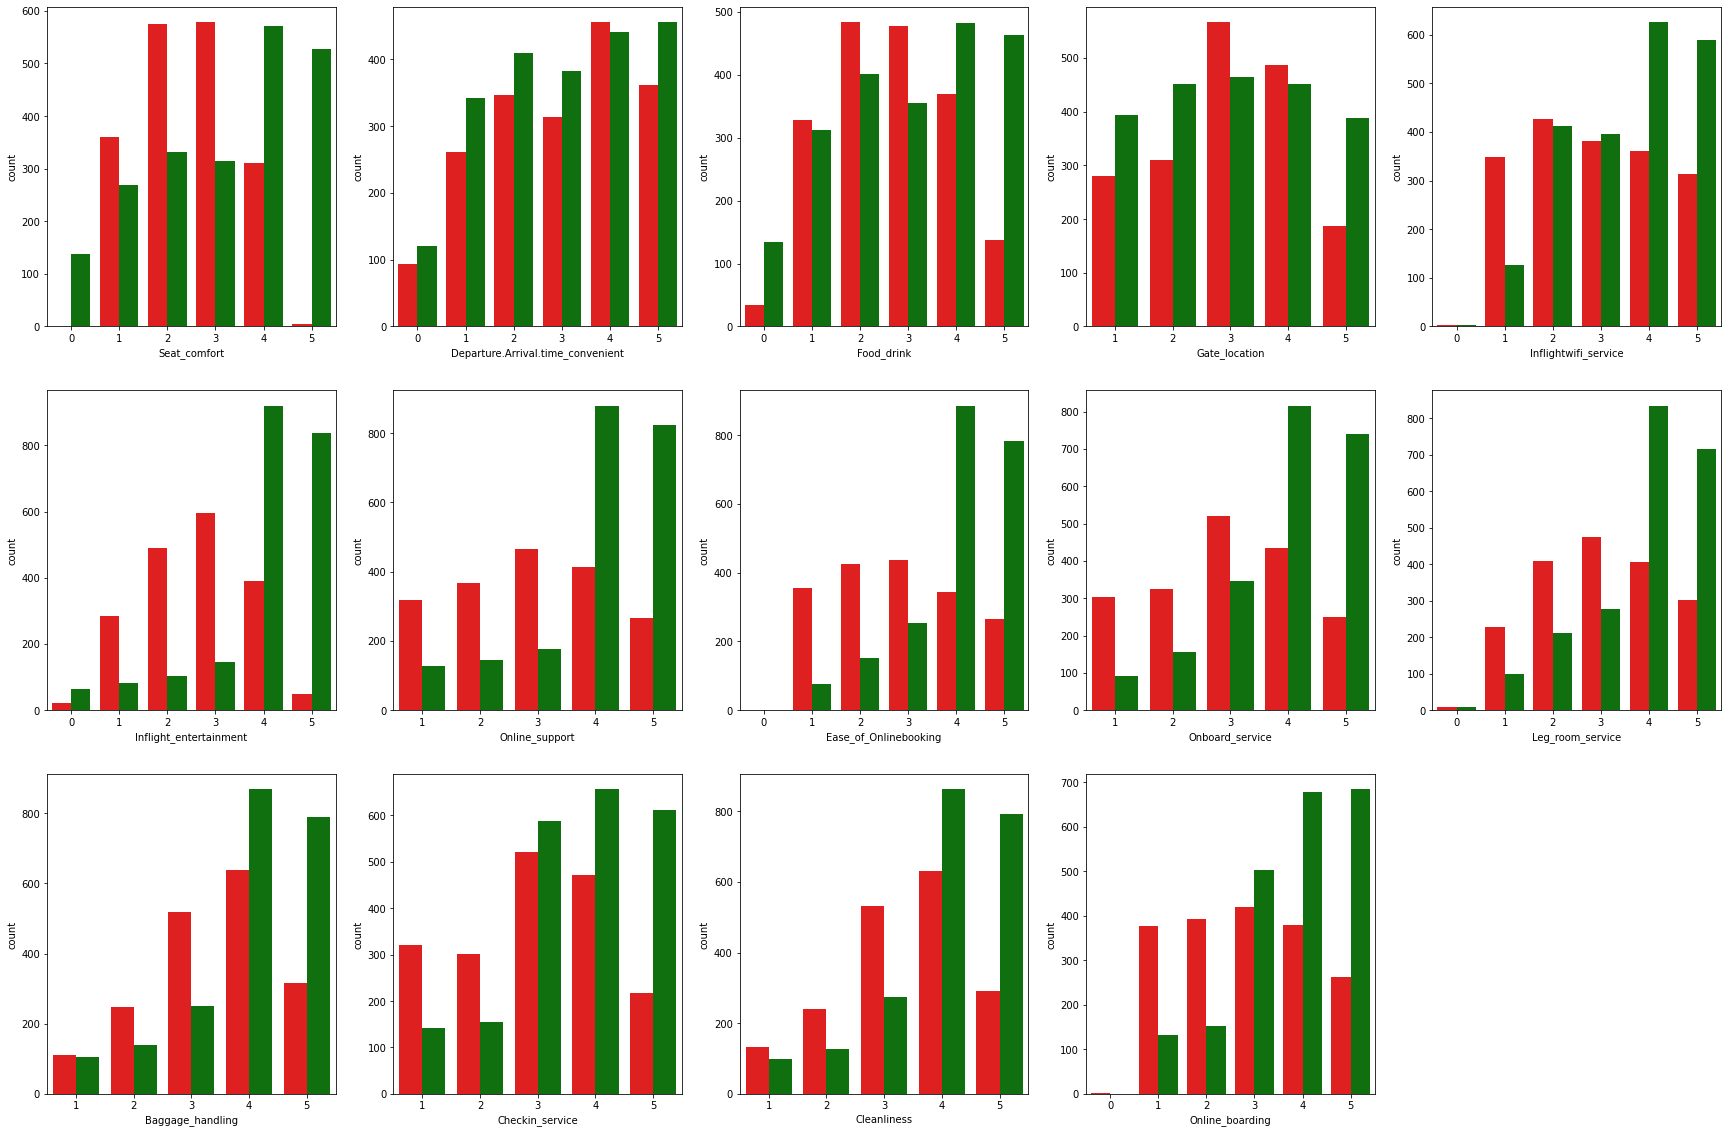

In [35]:
# Since there are a lot of columns that we want to plot, we can put all of them in one plot by using subplot()
# Additionally, since there are a lot of subplots that need to be plotted, we can use a for loop

plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback = [ 'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
           'Gate_location', 'Inflightwifi_service','Inflight_entertainment',
           'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
           'Leg_room_service', 'Baggage_handling','Checkin_service', 'Cleanliness', 'Online_boarding']

for i in feedback:
    plt.subplot(3, 5, pos)
    sns.countplot(df[i], hue = df.Satisfaction,
                  palette = {'satisfied':'green','neutral or dissatisfied': 'red'})
    plt.legend().remove();  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one   

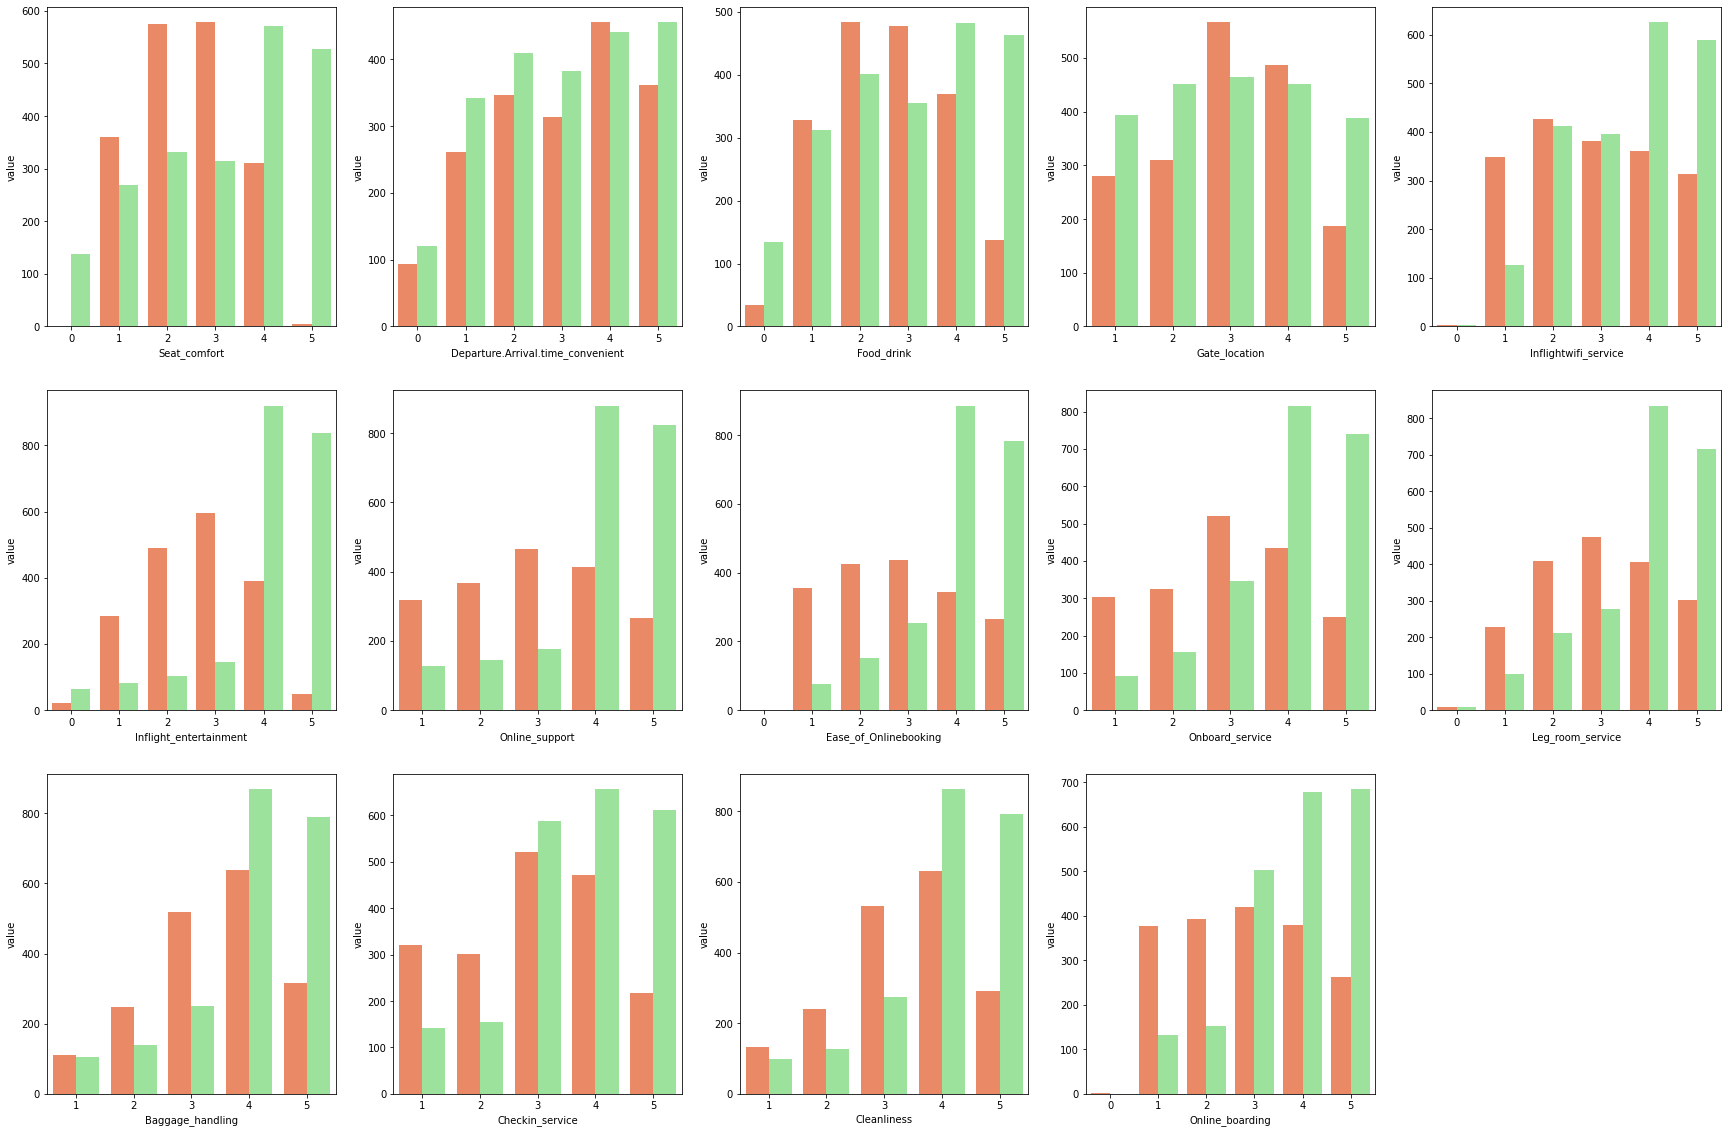

In [36]:
# Alternate way
# Using sns.barplot()

plt.figure(figsize= (30,20))  
pos = 1  

for i in feedback:
    ct = pd.crosstab(df[i], df.Satisfaction)  # Crosstab 
    stacked =ct.stack().reset_index().rename(columns={0:'value'}) #dataframe with name and count accross satisfaction levels
    plt.subplot(3, 5, pos)
    sns.barplot(x=stacked[i], y=stacked.value, hue=stacked.Satisfaction,
               palette = {'satisfied':'lightgreen','neutral or dissatisfied': 'coral'}) # Barplot
    plt.legend().remove();  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one    

### 9. Draw all the insights that you can from the plots

**Green and orange bars are counts of satisfied and dissatisfied customers respectively. We want to look for areas where there is a visually significant difference between the length of the stacked bars**

- From the plots above,
    - Seating comfort can cause high levels of satisfaction to customers. Hardly any people who rated highly for seat_comfort were dissatisfied
    - A similar case with respect to inflight_entertainment. In this case, having less entertainment seems to have caused far more dissatisfaction compared to bad seating.
    - Difference is observed in ease_of_online_booking quiet evidently

### 10. Print the average feedback score
- When Satisfaction columns equals 'satisfied'
- When Satisfaction columns is not equal to 'satisfied'

In [37]:
Feedback_cols = ['Seat_comfort', 'Departure.Arrival.time_convenient',
                 'Food_drink', 'Gate_location', 'Inflightwifi_service',
                 'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking', 
                 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service',
                 'Cleanliness', 'Online_boarding']

In [38]:
df.groupby('Satisfaction').mean() # Average rating of individual feedback attributes across satisfaction levels


,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Satisfaction,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,2.464227,3.015292,2.673949,2.994539,2.921901,2.654833,2.965593,2.855816,3.001092,3.061715,3.438012,2.980339,3.387220,2.865101,37.421081,2037.318405,16.783725,17.418897
satisfied,3.161320,2.952115,2.989307,2.995351,3.527197,3.996281,3.986518,3.998605,3.907950,3.848443,3.977220,3.668991,3.987448,3.756857,41.049279,1933.421664,11.887494,12.332404


### 11. Draw any insights that you can from the above values

- Observe the Exreme values (lower side for 'dissatisfaction' and higher side for 'satisfaction')
- Bad seats are a strong cause for customer dissatisfication
- Time convenience doesn't seem to be that big of a deal
- Dissatisfied customers had some bad experiences with food but average food seems to satisfy most people
- Gate location is totally irrelevant
- Wifi is quiet a factor. On an average, having good wifi yeilded customer satisfaction
- Easy online booking facility seems to be very important for customer satisfaction
- In flight entertainment seems to be a deal breaker

### 12. Create a new column which is the mean of 'Ease_of_Onlinebooking', 'Online_boarding', 'Online_support' and name it "avg_feedback_of_online_services". 

DIY : If online services has a bad ratings then what is the average ratings of other feedback attributes? 
And how does it impact Final Satisfaction of customers?

In [39]:
online_df = df.loc[:, ['Ease_of_Onlinebooking', 'Online_boarding', 'Online_support']]
online_df['avg_feedback_of_online_services'] = online_df.mean(axis = 1)

online_df['avg_feedback_of_online_services'].value_counts()

4.000000    816
3.000000    514
5.000000    507
4.333333    406
2.000000    383
1.000000    296
3.666667    259
4.666667    238
3.333333    177
2.666667    173
2.333333    147
1.666667     49
1.333333     16
0.666667      1
Name: avg_feedback_of_online_services, dtype: int64

# Model building and evaluation

### 14. Encode the columns "Gender", "CustomerType", "TypeTravel", "Class", "Satisfaction" 
- Use manual encoding or other type of encoding

In [40]:
# Number of classes in each of the categorical attributes
for i in df.columns:
    if df[i].dtype == 'O':
        print(i, '->', len(df[i].value_counts()))

Satisfaction -> 2
Gender -> 2
CustomerType -> 2
TypeTravel -> 2
Class -> 3


In [41]:
df.Class.value_counts()

Business    1909
Eco         1793
Eco Plus     280
Name: Class, dtype: int64

In [42]:
df.dtypes

Satisfaction                          object
Seat_comfort                           int64
Departure.Arrival.time_convenient      int64
Food_drink                             int64
Gate_location                          int64
Inflightwifi_service                   int64
Inflight_entertainment                 int64
Online_support                         int64
Ease_of_Onlinebooking                  int64
Onboard_service                        int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Cleanliness                            int64
Online_boarding                        int64
Gender                                object
CustomerType                          object
Age                                    int64
TypeTravel                            object
Class                                 object
Flight_Distance                        int64
DepartureDelayin_Mins                  int64
ArrivalDel

In [43]:
#Manuanl Encoding
df.replace({'Loyal Customer' : 1, 'disloyal Customer' : 0,
               'Business travel' : 1, 'Personal Travel' : 0,
              'Female' : 0, 'Male' : 1,
               'satisfied':1, 'neutral or dissatisfied':0,'Eco':0,'Eco Plus': 1,'Business':2}, inplace = True)

In [44]:
#onehotencoding
df_coded = pd.get_dummies(df)

In [45]:
df_coded

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,0,1,3,3,3,1,2,1,1,3,...,2,1,1,1,30,1,2,1354,11,8.0
191830,1,4,4,4,3,1,4,1,1,1,...,3,1,1,0,24,1,0,2291,0,0.0
228137,1,5,5,5,5,3,5,5,4,4,...,4,3,1,1,47,1,2,657,0,0.0
240081,1,1,1,1,1,5,5,5,4,2,...,3,5,0,1,30,1,2,5342,140,125.0
233692,1,1,1,1,1,2,5,5,5,5,...,5,3,1,1,58,1,2,351,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171869,0,3,5,3,4,3,3,3,3,1,...,2,3,0,1,12,0,0,1170,0,0.0
181163,0,2,0,2,1,3,2,3,3,3,...,2,3,1,0,20,1,0,1945,0,0.0
185132,0,2,5,2,1,1,2,1,1,4,...,4,1,0,0,27,1,0,2501,0,0.0


In [46]:
df_coded.columns

Index(['Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Class', 'Flight_Distance',
       'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'],
      dtype='object')

In [47]:
df_coded.head()

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,0,1,3,3,3,1,2,1,1,3,...,2,1,1,1,30,1,2,1354,11,8.0
191830,1,4,4,4,3,1,4,1,1,1,...,3,1,1,0,24,1,0,2291,0,0.0
228137,1,5,5,5,5,3,5,5,4,4,...,4,3,1,1,47,1,2,657,0,0.0
240081,1,1,1,1,1,5,5,5,4,2,...,3,5,0,1,30,1,2,5342,140,125.0
233692,1,1,1,1,1,2,5,5,5,5,...,5,3,1,1,58,1,2,351,0,0.0


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Satisfaction,3982.0,0.540181,0.498445,0.0,0.00,1.0,1.00,1.0
Seat_comfort,3982.0,2.840784,1.379057,0.0,2.00,3.0,4.00,5.0
Departure.Arrival.time_convenient,3982.0,2.981165,1.525599,0.0,2.00,3.0,4.00,5.0
Food_drink,3982.0,2.844299,1.429360,0.0,2.00,3.0,4.00,5.0
Gate_location,3982.0,2.994977,1.297680,1.0,2.00,3.0,4.00,5.0
Inflightwifi_service,3982.0,3.248870,1.337193,0.0,2.00,3.0,4.00,5.0
Inflight_entertainment,3982.0,3.379458,1.335433,0.0,2.00,4.0,4.00,5.0
Online_support,3982.0,3.517077,1.314264,1.0,3.00,4.0,5.00,5.0
Ease_of_Onlinebooking,3982.0,3.473129,1.311804,0.0,2.00,4.0,5.00,5.0
Onboard_service,3982.0,3.490959,1.259096,1.0,3.00,4.0,4.00,5.0


# Scaling

* MinMax Scaling - scales the data set such that all feature values are in the range [0, 1].
* StandardScaler - removes the mean and scales the data to unit variance


You can learn about other scalers here -
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html


In [49]:
df_coded.columns

Index(['Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Class', 'Flight_Distance',
       'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'],
      dtype='object')

In [50]:
#Here we are going to use StandardScaler to scale our data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#What all columns to scale? I have preferred all columns except onehotencoded columns and target columns as
#scaling of target feature will not change anything as they already have values like 0 and 1 only.
#You may only scale numerical features and leave categorical features as required according to business problem need and results.
cols_to_scale = ['Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Age', 'Flight_Distance','DepartureDelayin_Mins', 'ArrivalDelayin_Mins']

df_coded[cols_to_scale] = scaler.fit_transform(df_coded[cols_to_scale].to_numpy())

In [51]:
df_coded.describe()

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
count,3982.000000,3.982000e+03,3.982000e+03,3.982000e+03,3.982000e+03,3.982000e+03,3.982000e+03,3.982000e+03,3.982000e+03,3.982000e+03,...,3.982000e+03,3.982000e+03,3982.000000,3982.000000,3.982000e+03,3982.000000,3982.000000,3.982000e+03,3.982000e+03,3.982000e+03
mean,0.540181,-7.494424e-17,1.605948e-16,8.029740e-17,-1.356134e-16,-9.635688e-17,-7.851301e-17,-9.100372e-17,2.435688e-16,7.137546e-18,...,-1.802230e-16,-1.249071e-17,0.499247,0.822451,-1.967286e-16,0.691612,1.029131,9.814126e-18,1.962825e-17,-1.427509e-17
std,0.498445,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,...,1.000126e+00,1.000126e+00,0.500062,0.382181,1.000126e+00,0.461886,0.963882,1.000126e+00,1.000126e+00,1.000126e+00
min,0.000000,-2.060205e+00,-1.954340e+00,-1.990161e+00,-1.537534e+00,-2.429924e+00,-2.530926e+00,-1.915440e+00,-2.647930e+00,-1.978619e+00,...,-2.394612e+00,-2.531849e+00,0.000000,0.000000,-2.193734e+00,0.000000,0.000000,-1.866034e+00,-3.957815e-01,-4.029985e-01
25%,0.000000,-6.097567e-01,-6.432152e-01,-5.907575e-01,-7.668318e-01,-9.340660e-01,-1.033096e+00,-3.934840e-01,-1.123120e+00,-3.899788e-01,...,-6.283167e-01,-1.018857e+00,0.000000,1.000000,-8.387810e-01,0.000000,0.000000,-6.199578e-01,-3.957815e-01,-4.029985e-01
50%,1.000000,1.154677e-01,1.234736e-02,1.089440e-01,3.870933e-03,-1.861370e-01,4.647335e-01,3.674938e-01,4.016888e-01,4.043412e-01,...,2.548309e-01,4.941352e-01,0.000000,1.000000,4.193820e-02,1.000000,1.000000,-4.426816e-02,-3.957815e-01,-4.029985e-01
75%,1.000000,8.406920e-01,6.679099e-01,8.086455e-01,7.745736e-01,5.617919e-01,4.647335e-01,1.128472e+00,1.164093e+00,4.043412e-01,...,1.137978e+00,4.941352e-01,1.000000,1.000000,7.871621e-01,1.000000,2.000000,5.401404e-01,-8.786474e-02,-7.337592e-02
max,1.000000,1.565916e+00,1.323473e+00,1.508347e+00,1.545276e+00,1.309721e+00,1.213648e+00,1.128472e+00,1.164093e+00,1.198661e+00,...,1.137978e+00,1.250631e+00,1.000000,1.000000,3.090581e+00,1.000000,2.000000,4.655704e+00,1.183691e+01,1.154582e+01


In [52]:
df_coded.head()

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,0,-1.334981,0.012347,0.108944,0.003871,-1.681995,-1.033096,-1.915440,-1.885525,-0.389979,...,-1.511464,-1.775353,1,1,-0.635538,1,2,-0.607606,-0.087865,-0.183250
191830,1,0.840692,0.667910,0.808645,0.003871,-1.681995,0.464733,-1.915440,-1.885525,-1.978619,...,-0.628317,-1.775353,1,0,-1.042024,1,0,0.300128,-0.395782,-0.402998
228137,1,1.565916,1.323473,1.508347,1.545276,-0.186137,1.213648,1.128472,0.401689,0.404341,...,0.254831,-0.262361,1,1,0.516172,1,2,-1.282836,-0.395782,-0.402998
240081,1,-1.334981,-1.298778,-1.290459,-1.537534,1.309721,1.213648,1.128472,0.401689,-1.184299,...,-0.628317,1.250631,0,1,-0.635538,1,2,3.255836,3.523159,3.030570
233692,1,-1.334981,-1.298778,-1.290459,-1.537534,-0.934066,1.213648,1.128472,1.164093,1.198661,...,1.137978,-0.262361,1,1,1.261395,1,2,-1.579279,-0.395782,-0.402998


In [53]:
df = df_coded

### 15. Seperate the column "Satisfaction" from the rest of the columns
- Create X and y

In [54]:
#We are going to drop highly correlated feature which we have found before as there features might affect our models.
to_drop 

['DepartureDelayin_Mins']

In [55]:
X = df.drop(columns= ['Satisfaction', 'DepartureDelayin_Mins'])  # Seperating the target and the rest
#X = df.drop(columns= ['Satisfaction'])
y = df.Satisfaction

### 16. Create train and test datasets
- Use train_test_split

In [56]:
from sklearn.model_selection import train_test_split # Splitting the data for training and testing out model

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, stratify = y)

In [57]:
y_train.value_counts(normalize=True)

1    0.540188
0    0.459812
Name: Satisfaction, dtype: float64

In [58]:
y_test.value_counts(normalize=True)

1    0.540161
0    0.459839
Name: Satisfaction, dtype: float64

In [59]:
X_train.dtypes

Seat_comfort                         float64
Departure.Arrival.time_convenient    float64
Food_drink                           float64
Gate_location                        float64
Inflightwifi_service                 float64
Inflight_entertainment               float64
Online_support                       float64
Ease_of_Onlinebooking                float64
Onboard_service                      float64
Leg_room_service                     float64
Baggage_handling                     float64
Checkin_service                      float64
Cleanliness                          float64
Online_boarding                      float64
Gender                                 int64
CustomerType                           int64
Age                                  float64
TypeTravel                             int64
Class                                  int64
Flight_Distance                      float64
ArrivalDelayin_Mins                  float64
dtype: object

### 17. Print accuracy
- Print accuracy on test data using below models
- Logistic regression model trained using all the attributes
- Logistic regression model trained using only the feedback columns
- Decision tree model trained using all the attributes
- Random forest model trained using all the attributes

Logistic Regression

In [60]:
#Logistic Regression with only feedback columns
from sklearn.linear_model import LogisticRegression #importing logistic regression

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)  # Predictions from logistic regression
score1 = lr.score(X_test, y_test)
score1

0.8363453815261044

Predicting customer satisfaction solely based on the feedback

In [61]:
feedback

['Seat_comfort',
 'Departure.Arrival.time_convenient',
 'Food_drink',
 'Gate_location',
 'Inflightwifi_service',
 'Inflight_entertainment',
 'Online_support',
 'Ease_of_Onlinebooking',
 'Onboard_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

In [62]:
#Logistic Regression with only feedback columns
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,feedback], y, random_state = 1, stratify = y)

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

score2 = lr.score(X_test, y_test)

print(f'Number of features used = {len(X_train.columns)}')
print(f'Accuracy in predicting customer satisfaction solely based on the feedback = {score2}')

Number of features used = 14
Accuracy in predicting customer satisfaction solely based on the feedback = 0.8082329317269076


Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

score3 = dt.score(X_test, y_test)
pred = dt.predict(X_test)

print(f"Decision tree acccuracy score: {score3}")

Decision tree acccuracy score: 0.8865461847389559


Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

score4 = rf.score(X_test, y_test)

print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.928714859437751


### 18. Print feature importance
- Print feature importance of Random Forest



In [65]:
#Decision Tree 
pd.Series(dt.feature_importances_, X_train.columns ).sort_values(ascending= False)

Inflight_entertainment               0.359210
Seat_comfort                         0.157127
Ease_of_Onlinebooking                0.075532
Flight_Distance                      0.048678
TypeTravel                           0.044419
Age                                  0.033572
Leg_room_service                     0.033397
CustomerType                         0.030903
Checkin_service                      0.028283
Gender                               0.025604
Online_support                       0.025062
Departure.Arrival.time_convenient    0.021545
Cleanliness                          0.018042
ArrivalDelayin_Mins                  0.016316
Baggage_handling                     0.015971
Onboard_service                      0.014272
Class                                0.013352
Food_drink                           0.012461
Online_boarding                      0.011301
Gate_location                        0.008021
Inflightwifi_service                 0.006935
dtype: float64

In [66]:
#RandomForest
pd.Series(rf.feature_importances_, X_train.columns).sort_values(ascending= False)
## Alternate Way
##pd.DataFrame({'Attribute': X_train.columns, 'Importance': rf.feature_importances_}) 

Inflight_entertainment               0.182958
Seat_comfort                         0.107081
Ease_of_Onlinebooking                0.079810
Online_support                       0.061944
Leg_room_service                     0.052373
Flight_Distance                      0.048931
Class                                0.045638
Onboard_service                      0.043488
Food_drink                           0.041995
Age                                  0.041755
CustomerType                         0.036490
Online_boarding                      0.034945
Gender                               0.030345
Checkin_service                      0.027833
TypeTravel                           0.026470
Baggage_handling                     0.025836
Departure.Arrival.time_convenient    0.025486
Cleanliness                          0.025013
Gate_location                        0.021402
ArrivalDelayin_Mins                  0.021076
Inflightwifi_service                 0.019131
dtype: float64

# Model Tuning

### 19. Print cross validation score
- Decision tree model trained using all the attributes
- Random Forest model trained using all the attributes
- Fine tuned (using Grid Search or Random Search) Random Forest model

**Display all the scores above with their respective models in a single dataframe**



Cross Validation Score

In [67]:
from sklearn.model_selection import cross_val_score
#For Decision Tree dt
scores = cross_val_score(dt, X, y, cv = 10)
print(scores)

[0.87969925 0.89223058 0.89447236 0.86432161 0.90954774 0.8919598
 0.88442211 0.89698492 0.89698492 0.90201005]


In [68]:
score5=scores.mean()

In [69]:
print(f'Cross validation score of Decision tree = {score5}')

Cross validation score of Decision tree = 0.8912633342149343


In [70]:
#Random Forest rf
score6 = cross_val_score(rf, X, y, cv = 10)

In [71]:
print(score6)

[0.94235589 0.93483709 0.91959799 0.91457286 0.92462312 0.91708543
 0.93718593 0.92462312 0.9321608  0.91457286]


In [72]:
score6=score6.mean()

In [73]:
print(f'Cross validation score of RF = {score6.mean()}')

Cross validation score of RF = 0.9261615093008903


Parameter Tuning Using GridDSearch

Doing it only for RandomForest as the mean CV score is better.

In [74]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_


# Best parameters
#{'bootstrap': True,
# 'max_depth': 30,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 1,
#  'n_estimators': 100} 


Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [75]:
rf = RandomForestClassifier(bootstrap= True,
 max_depth= 20,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 n_estimators= 100)

score7 = cross_val_score(rf, X, y, cv = 5).mean()
score7    

0.9241562265530916

In [76]:
data = {'Technique' : ['Logistic Regression', "LR with only feedback columns ", 'Decision tree',
                       'Random forest', 'DT CV','RF CV','Tuned RF CV'],
       'Score' : [score1, score2, score3, score4, score5, score6, score7] }

result = pd.DataFrame(data)

In [77]:
result

,Technique,Score
0,Logistic Regression,0.836345
1,LR with only feedback columns,0.808233
2,Decision tree,0.886546
3,Random forest,0.928715
4,DT CV,0.891263
5,RF CV,0.926162
6,Tuned RF CV,0.924156


# Pipeline - Automate and Simplify the process

<img src="Pipeline.png">

In [92]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 737 kB/s 


In [93]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import *

In [94]:
numeric_features = ['Age', 'Flight_Distance', 'DepartureDelayin_Mins']

feedback_features = ['Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
       'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Cleanliness', 'Online_boarding']

other_cat_cols =  ['Gender', 'CustomerType', 'TypeTravel', 'Class']


#TRANSFORMERS

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


feedback_feature_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('label_encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])


other_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('feed_col', feedback_feature_transformer, feedback_features),
        ('other_cat_col', other_cat_transformer, other_cat_cols )
    ])

In [95]:
#Adding into Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(bootstrap= True,max_depth= 20,max_features= 'sqrt',min_samples_leaf= 1,n_estimators= 100))])

In [96]:
#Taking the raw data
data = df2.set_index("Id").join(df1.set_index("ID"))

In [97]:
#Getting X and y
X_pipe = data.drop(['Satisfaction', 'ArrivalDelayin_Mins'], axis = 1)
y_pipe = data['Satisfaction']

In [98]:
#Data SPlit
X_trains, X_tests, y_trains, y_tests = train_test_split(X_pipe,y_pipe, stratify = y_pipe)

In [99]:
#Fitting Pipeline 
clf.fit(X_trains, y_trains)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight_Distance',
                                                   'DepartureDelayin_Mins']),
                                                 ('feed_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='not_captured',
                                                                                 strategy='constant')),
                                                          

In [100]:
#Getting score 
clf.score(X_tests, y_tests)

0.9348086124401914